In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [34]:
with open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

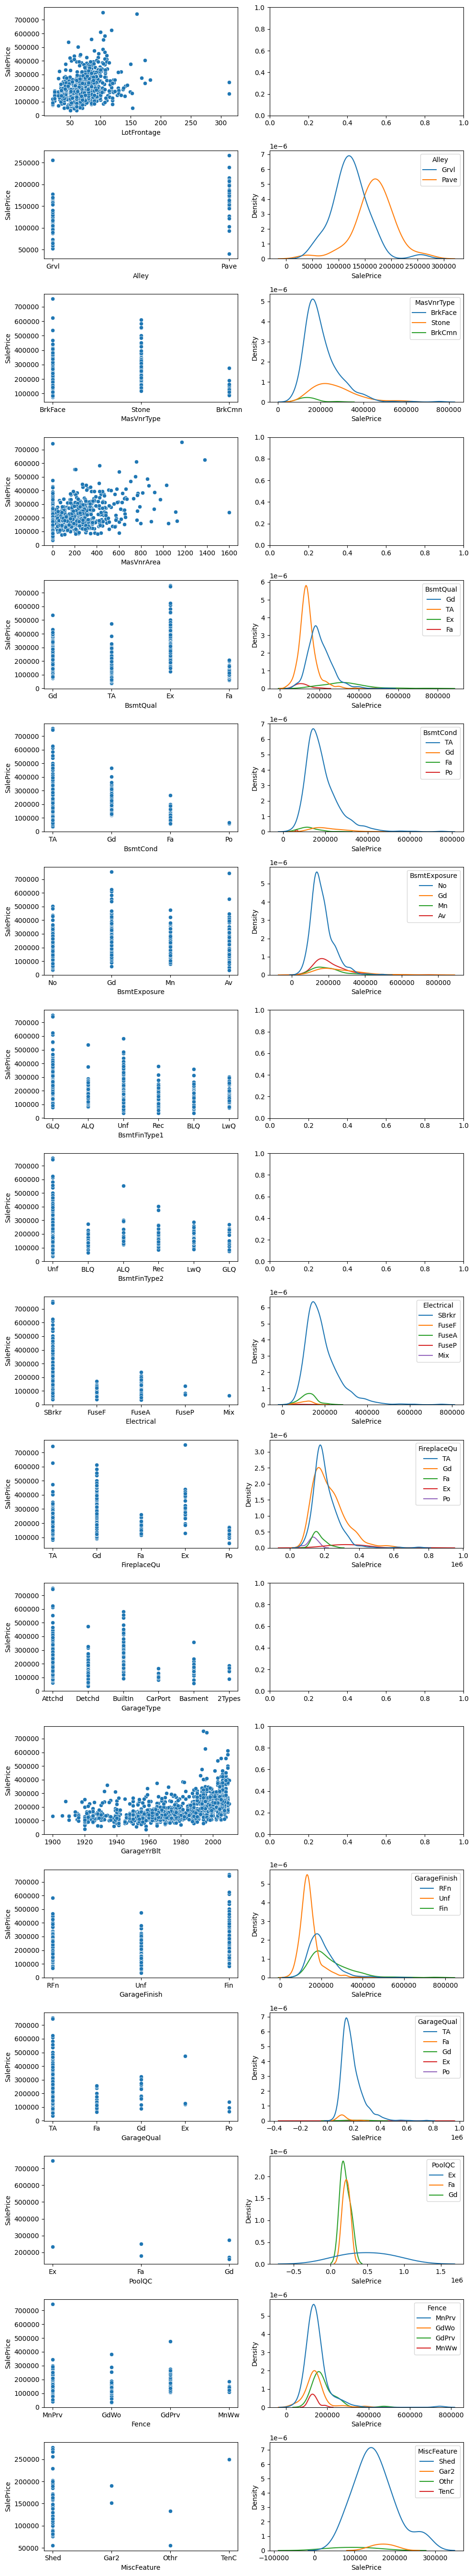

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot(df):
    l=[]
    s=0
    for i in df.columns:
        c=df[i].isnull().sum()
        if c>0:
            s+=1
            l.append(i)
    fig, axis = plt.subplots(figsize=(10, 3*s),nrows=s, ncols=2)
    axis=axis.flatten()
    for i in range(len(l)):
        if df[l[i]].nunique()<6:
            sns.kdeplot(df,x='SalePrice',hue=l[i],ax=axis[2*i+1])
        sns.scatterplot(df, x=l[i],y='SalePrice', ax=axis[2*i])
    plt.tight_layout()
plot(df)

In [35]:
df.MasVnrType.value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [40]:
df.MasVnrType.value_counts()

MasVnrType
1    813
0    619
2     28
Name: count, dtype: int64

In [51]:


# df.info()
# df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotFrontage      1201 non-null   float64
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   Alley            1460 non-null   int64  
 7   LotShape         1460 non-null   object 
 8   LandContour      1460 non-null   object 
 9   Utilities        1460 non-null   object 
 10  LotConfig        1460 non-null   object 
 11  LandSlope        1460 non-null   object 
 12  Neighborhood     1460 non-null   object 
 13  Condition1       1460 non-null   object 
 14  Condition2       1460 non-null   object 
 15  BldgType         1460 non-null   object 
 16  HouseStyle       1460 non-null   object 
 17  OverallQual   

In [59]:
df.BsmtCond.nunique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [60]:
df.BsmtQual.nunique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [61]:
help(df.BsmtQual.map)

Help on method map in module pandas.core.series:

map(arg: 'Callable | Mapping | Series', na_action: "Literal['ignore'] | None" = None) -> 'Series' method of pandas.core.series.Series instance
    Map values of Series according to an input mapping or function.
    
    Used for substituting each value in a Series with another value,
    that may be derived from a function, a ``dict`` or
    a :class:`Series`.
    
    Parameters
    ----------
    arg : function, collections.abc.Mapping subclass or Series
        Mapping correspondence.
    na_action : {None, 'ignore'}, default None
        If 'ignore', propagate NaN values, without passing them to the
        mapping correspondence.
    
    Returns
    -------
    Series
        Same index as caller.
    
    See Also
    --------
    Series.apply : For applying more complex functions on a Series.
    Series.replace: Replace values given in `to_replace` with `value`.
    DataFrame.apply : Apply a function row-/column-wise.
    DataFr

In [ ]:
def label_(f):
       if f=='Ex':
            return 5
        elif f=='Gd':
            return 4
        elif f=='TA':
            return 3
        elif f=='Fa':
            return 2
        elif f=='Po':
            return 1
        else:
            return 0

# def LotFrontage_fill(df):
#     if df.LotFrontage:
#         return df.LotFrontage


def map_fill(f):
    if f=='Ex':
        return 5
    elif f=='Gd':
        return 4
    elif f=='TA':
        return 3
    elif f=='Fa':
        return 2
    elif f=='Po':
        return 1
    else:
        return 0

def MasVnrType_fill(df):
    if df.MasVnrType:
        if df.MasVnrType=='BrkFace':
            return 1
        elif df.MasVnrType=='Stone':
            return 2
        else:
            return 0
    elif df.SalePrice > 400000:
        return 2
    elif df.SalePrice > 150000:
        return 1
    else:
        return 0


def clean(df):
    df.drop(['PoolQC','MiscFeature', 'Fence','GarageCars'], axis=1, inplace = True, errors= 'ignore')
    df['BsmtQual'] = df.apply(map_fill)
    df['BsmtCond'] = df.apply(map_fill)
    df['FireplaceQu']= df.apply(map_fill)
    df['Alley'] = df.apply(lambda df : 0 if df.SalePrice < 160000 else 1, axis =1)
    df['MasVnrType'] = df.apply(lambda df: MasVnrType_fill(df), axis =1)
    df.LotFrontage.interpolate('linear',inplace=True)
    df = pd.get_dummies(df, columns=['PoolQC'], drop_first=True, dtype='int')
    
    return df
    

In [16]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [11]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a diction

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.PoolQC.unique()

In [ ]:
df[(df.PoolQC.notnull())][['PoolQC','SalePrice']]

In [ ]:
df[(df.PoolQC.notnull())][['PoolQC','SalePrice']]
import seaborn as sns
sns.scatterplot(df, x='PoolQC', y='SalePrice')

In [ ]:
def clean(df):
    df.drop('PoolQC', axis=1, inplace = True, errors= 'ignore')
    df.drop('MiscFeature', axis=1, inplace = True, errors= 'ignore')

In [ ]:
df.drop('PoolQC', axis=1, inplace = True, errors= 'ignore')

In [ ]:
df.info()

In [ ]:
df.MiscFeature.unique()

In [ ]:
# df[(df.MiscFeature.notnull())][['MiscFeature','SalePrice']]
import seaborn as sns
# sns.scatterplot(df, x='MiscFeature', y='SalePrice')
df.MiscFeature.value_counts()

In [ ]:
df.drop('MiscFeature',axis=1,inplace=True,errors='ignore')

In [ ]:
df.info()

In [ ]:
df.Fence.unique()

In [ ]:
sns.scatterplot(df, x='Fence', y='SalePrice')
df.Fence.value_counts()

In [ ]:
sns.kdeplot(df,x='SalePrice',hue='Fence')

In [ ]:
df.Alley.isnull().sum()

In [ ]:
axis=np.array([[1,2],[3,4],[5,6]])
axis.flatten()

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
df.drop('Fence', axis=1, inplace= True)

In [ ]:
df.info()

In [ ]:
df.drop(['GarageCars', 'GarageQual'], inplace = True, axis=1, errors = 'ignore')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.GarageCond.unique()

In [6]:
def fun(d):
    if d=='Ex':
        return 5
    elif d=='Gd':
        return 4
    elif d=='TA':
        return 3
    elif d=='Fa':
        return 2
    elif d=='Po':
        return 1
    else:
        return 0
df.GarageCond= df.GarageCond.map(fun)
df.GarageCond.unique()

array([3, 2, 0, 4, 1, 5])

In [ ]:
df.info()

In [ ]:
import seaborn as sns

In [ ]:
sns.barplot(x= 'GarageType', y = 'SalePrice', data = df,)

In [ ]:
df.head()

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(df, y='SalePrice')

In [ ]:
Q1= np.percentile(df['SalePrice'],25)
Q1

In [ ]:
Q3= np.percentile(df['SalePrice'],75)
Q3

In [ ]:
IQR = Q3-Q1

In [ ]:
min1 = Q1-(3/2)*IQR

In [ ]:
max1= Q3+(3/2)*IQR

In [ ]:
df[(df.SalePrice>max1)].loc[:, 'SalePrice']

In [ ]:
sns.boxplot(df[(df.SalePrice>max1)], y='SalePrice')